In [1]:
from __future__ import division, print_function, absolute_import 

In [16]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.01
training_epochs = 20 
batch_size = 256
display_step = 1
examples_to_show = 10


In [5]:
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

In [6]:
X = tf.placeholder("float", [None, n_input])

In [7]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input]))
}

In [8]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [9]:
# Construct model 
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [10]:
# Prediction 
y_pred = decoder_op 
y_true = X

In [11]:
# loss and optimizer 
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.230896041
Epoch: 0002 cost= 0.199788898
Epoch: 0003 cost= 0.183734566
Epoch: 0004 cost= 0.175904959
Epoch: 0005 cost= 0.167851016
Epoch: 0006 cost= 0.157765374
Epoch: 0007 cost= 0.156393930
Epoch: 0008 cost= 0.151999786
Epoch: 0009 cost= 0.147219673
Epoch: 0010 cost= 0.147077352
Epoch: 0011 cost= 0.146895647
Epoch: 0012 cost= 0.142196044
Epoch: 0013 cost= 0.140675709
Epoch: 0014 cost= 0.139053285
Epoch: 0015 cost= 0.134391904
Epoch: 0016 cost= 0.132259160
Epoch: 0017 cost= 0.129725590
Epoch: 0018 cost= 0.129708141
Epoch: 0019 cost= 0.131404579
Epoch: 0020 cost= 0.126920566
Optimization Finished!


/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


NotImplementedError: 

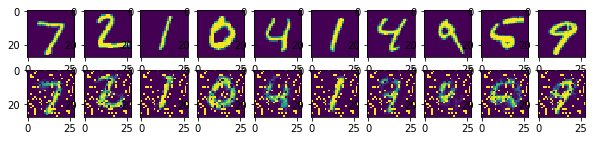

In [17]:
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    f, a = plt.subplots(2, 10, figsize=(10,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.waitforbuttonpress()